In [1]:
import pandas as pd
import numpy as np
import mysql.connector
from mysql.connector import Error
from datetime import datetime
import env
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def run_query(sql_name):
    # Connect to the MySQL database (replace the placeholders with your actual credentials)
    host = env.db_host
    user = env.db_user
    password = env.db_password
    database = env.db_schema
    port = 33144

    # Create a connection to the database
    connection = mysql.connector.connect(host=host, user=user, password=password, database=database, port=port)

    # Create a cursor object to execute the SQL query
    cursor = connection.cursor()

    # Define the SQL query
    current_dir = f"./"
    file_path = f'{current_dir}{sql_name}'

    # Read the content of the file into a variable
    with open(file_path, 'r') as file:
        query = file.read()

    # Execute the query
    cursor.execute(query)

    # Fetch all the results into a list of tuples
    results = cursor.fetchall()

    # Get the column names from the cursor description
    columns = [col[0] for col in cursor.description]

    # Close the cursor and the connection
    cursor.close()
    connection.close()

    # Create a DataFrame from the results and column names
    df = pd.DataFrame(results, columns=columns)
    return df

In [3]:
# mager maka auto hapus yg korelasi tinggi
def remove_highly_correlated_features(df, threshold=0.9):
    """
    Menghapus fitur yang memiliki korelasi lebih dari ambang batas tertentu.
    
    Parameters:
    - df: DataFrame yang berisi fitur-fitur yang akan diperiksa.
    - threshold: Ambang batas korelasi.
    
    Returns:
    - DataFrame yang telah dikurangi fiturnya.
    """
    # Hanya mengambil kolom numerik untuk korelasi
    numeric_df = df.select_dtypes(include=[np.number])
    correlation_matrix = numeric_df.corr().abs()
    
    # Dapatkan matriks segitiga atas dari matriks korelasi
    upper_triangle = correlation_matrix.where(
        np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    
    #print(f"kolom dengan korelasi di atas {threshold}: {upper_triangle.columns}")
    
    # Temukan indeks kolom fitur yang memiliki korelasi lebih dari ambang batas
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    
    return df.drop(columns=to_drop)

In [4]:
def manual_oversample(X, y):
    # Dapatkan indeks dari kelas minoritas
    minority_class_indices = y[y == 1].index
    majority_class_indices = y[y == 0].index
    
    # Hitung jumlah kelas mayoritas
    num_majority = len(y[y == 0])
    
    # Dapatkan sampel acak dari kelas minoritas
    random_minority_indices = np.random.choice(minority_class_indices, num_majority, replace=True)
    
    # Gabungkan indeks kelas mayoritas dengan sampel acak dari kelas minoritas
    over_sample_indices = np.concatenate([majority_class_indices, random_minority_indices])
    
    # Dapatkan data yang oversampled
    X_oversampled = X.loc[over_sample_indices]
    y_oversampled = y.loc[over_sample_indices]
    
    return X_oversampled, y_oversampled

In [5]:
# download dataset
# download_df = run_query("queries/DATASET_INSTALLMENT_PAYMENT_MIN.sql")
# print("downloading...")
# download_df.set_index(['reco_id_curr'], inplace=True)
# print("generate csv...")
# download_df.to_csv("dataset/DATASET_INSTALLMENT_PAYMENT_MIN.csv")

# download_df = run_query("queries/DATASET_INSTALLMENT_PAYMENT_MAX.sql")
# print("downloading...")
# download_df.set_index(['reco_id_curr'], inplace=True)
# print("generate csv...")
# download_df.to_csv("dataset/DATASET_INSTALLMENT_PAYMENT_MAX.csv")

# download_df = run_query("test_queries/PREDICTION_BKI_BALANCE.sql")
# print("downloading...")
# #download_df.set_index(['reco_id_curr'], inplace=True)
# print("generate csv...")
# download_df.to_csv("prediction/PREDICTION_BKI_BALANCE.csv")

In [315]:
# credit appication
cred_app_df = pd.read_csv('dataset/DATASET_CREDIT_APPLICATION.csv')
cred_app_df = cred_app_df[['reco_id_curr',
 'contract_type_name',
 'gender',
 'own_car_flag',
 'own_realty_flag',
 'children_count',
 'income',
 'loan_body',
 'annuity_payment',
 'goods_price',
 'type_suite_name',
 'income_type_name',
 'education_type_name',
 'family_status_name',
 'housing_type_name',
 'population_relative_region',
 'days_birth',
 'days_employed',
 'registration_timestamp',
 'publication_timestamp',
 'age_own_car',
#  'mobile_flag',
 'employee_phone_flag',
#  'work_phone_flag',
 'mobile_contact_flag',
 'phone_flag',
#  'email_flag',
 'type_of_occupation',
 'family_members__count',
 'rating_client_region',
 'rating_client_w_city_region',
#  'start_weekday_appr_process',
'hour_of_approval_process_start',
#  'not_live_region_reg_region',
#  'not_work_region_reg_region',
#  'living_region_not_work_region_flag',
#  'not_live_city_reg_city',
#  'not_work_city_reg_city',
#  'living_city_not_work_city_flag',
#  'type_of_organization',
 'external_source_1',
 'external_source_2',
 'external_source_3',
#  'average_apartments',
#  'average_basementarea',
#  'average_years_beginexpluatation',
#  'average_years_building',
#  'average_commonarea',
#  'average_elevator_count',
#  'average_entrance_count',
#  'average_max_floors',
#  'average_min_floors',
#  'average_land_area',
#  'average_living_apartments',
 'average_living_area',
#  'non_living_apartments_av',
#  'non_living_area_avg',
#  'mode_apartments',
#  'mode_basementarea',
#  'mode_years_beginexpluatation',
 'mode_years_building',
#  'mode_commonarea',
#  'mode_elevator_count',
#  'mode_entrance_count',
#  'mode_max_floors',
#  'mode_min_floors',
 'mode_land_area',
#  'mode_living_apartments',
#  'mode_living_area',
#  'non_living_apartments_mode',
#  'non_living_area_mode',
 'median_apartments',
 'median_basementarea',
 'median_years_beginexpluatation',
 'median_years_building',
 'median_commonarea',
#  'median_elevator_count',
 'median_entrance_count',
 'median_max_floors',
 'median_min_floors',
 'median_land_area',
 'median_living_apartments',
 'median_living_area',
#  'non_living_apartments_medi',
#  'non_living_area_medi',
#  'fondkapremon_mode',
 'mode_house_type',
 'mode_total_area',
 'mode_walls_material',
 'emergency_state_mode',
 'observes_30_count_social_circle',
 'social_circle_defaults_30_days',
 'observes_60_count_social_circle',
 'social_circle_defaults_60_days',
 'last_phone_number_change',
#  'document_2_flag',
#  'document_3_flag',
#  'document_4_flag',
#  'document_5_flag',
#  'document_6_flag',
#  'document_7_flag',
#  'document_8_flag',
#  'document_9_flag',
#  'document_10_flag',
#  'document_11_flag',
#  'document_12_flag',
#  'document_13_flag',
#  'document_14_flag',
#  'document_15_flag',
#  'document_16_flag',
#  'document_17_flag',
#  'document_18_flag',
#  'document_19_flag',
#  'document_20_flag',
#  'document_21_flag',
#  'requests_bki_hour',
#  'requests_bki_day',
#  'requests_bki_week',
#  'requests_bki_month',
 'requests_bki_qrt',
 'requests_bki_year'
 ]].copy()

In [316]:

target_df = pd.read_csv('dataset/DATASET_TARGET.csv')
# add TARGET
gabung_df = cred_app_df.merge(target_df, on='reco_id_curr', how='left')

# add BKI
bki_df = pd.read_csv('dataset/DATASET_BKI.csv')
gabung_df = gabung_df.merge(bki_df, on='reco_id_curr', how='left')

# add BKI BALANCE
bki_balance_df = pd.read_csv('dataset/DATASET_BKI_BALANCE.csv')
gabung_df = gabung_df.merge(bki_balance_df, on='reco_bureau_id', how='left')

# add CASH BALANCE MIN
cash_balance_min_df = pd.read_csv('dataset/DATASET_CASH_BALANCE_MIN.csv')
gabung_df = gabung_df.merge(cash_balance_min_df, on='reco_id_curr', how='left')
# add CASH BALANCE MAX
cash_balance_max_df = pd.read_csv('dataset/DATASET_CASH_BALANCE_MAX.csv')
gabung_df = gabung_df.merge(cash_balance_max_df, on='reco_id_curr', how='left')

# add CRED BALANCE MIN
cred_balance_min_df = pd.read_csv('dataset/DATASET_CREDIT_BALANCE_MIN.csv')
gabung_df = gabung_df.merge(cred_balance_min_df, on='reco_id_curr', how='left')
# add CRED BALANCE MAX
cred_balance_max_df = pd.read_csv('dataset/DATASET_CREDIT_BALANCE_MAX.csv')
gabung_df = gabung_df.merge(cred_balance_max_df, on='reco_id_curr', how='left')

# add INSTALLMENT PAYMENT MIN
install_payment_min_df = pd.read_csv('dataset/DATASET_INSTALLMENT_PAYMENT_MIN.csv')
gabung_df = gabung_df.merge(install_payment_min_df, on='reco_id_curr', how='left')
# add INSTALLMENT PAYMENT MAC
install_payment_max_df = pd.read_csv('dataset/DATASET_INSTALLMENT_PAYMENT_MAX.csv')
gabung_df = gabung_df.merge(install_payment_max_df, on='reco_id_curr', how='left')

# add PREVIOUS_LOAN_AVG
prev_load_df = pd.read_csv('dataset/DATASET_PREVIOUS_LOAN_AVG.csv')
gabung_df = gabung_df.merge(prev_load_df, on='reco_id_curr', how='left')

gabung_df.set_index(['reco_id_curr'], inplace=True)

In [317]:
class_counts = gabung_df['target'].value_counts()
print(class_counts)

0    88434
1     7530
Name: target, dtype: int64


In [318]:
# delete some columns
# for i in range(2,22):
#     gabung_df.drop(columns=[f'document_{i}_flag'], inplace=True)
gabung_df.drop(gabung_df.filter(regex='Unnamed').columns, axis=1, inplace=True)
gabung_df.drop(gabung_df.filter(regex='reco_bureau_id').columns, axis=1, inplace=True)
gabung_df.drop(gabung_df.filter(regex='reco_id_last').columns, axis=1, inplace=True)
# gabung_df.drop(gabung_df[gabung_df.days_employed > 0].index, inplace=True)
gabung_df.drop(gabung_df[gabung_df['income'] > 700000].index, inplace=True)
gabung_df.drop(gabung_df[gabung_df['days_employed'] > 0].index, inplace=True)
gabung_df.drop(gabung_df[gabung_df['gender'] == 'XNA'].index, inplace=True)
# gabung_df.drop(gabung_df[gabung_df['requests_bki_year'] > 10].index, inplace=True)
# gabung_df.drop(gabung_df[gabung_df['children_count'] > 6].index, inplace=True)
# gabung_df.drop(columns=[f'reco_bureau_id', 'reco_id_last_x', 'reco_id_last_y'], inplace=True)
print(gabung_df.shape)
reduced_df = remove_highly_correlated_features(gabung_df)

(78397, 140)


In [319]:
# print(gabung_df.isna().sum())
# knn_imput_candidates = []
with open('na_columns.csv', 'w') as f:
    f.write(f'column, na_count\n')
    for col in gabung_df.columns:
        f.write(f"{col}, {gabung_df[col].isna().sum()}\n")
        # if gabung_df[col].isna().sum() > 50000:
        #     knn_imput_candidates.append(col)
    f.close()

In [320]:
merged_columns = []
for col in gabung_df.columns:
    merged_columns.append(col)
    
reduced_columns = []
for col in reduced_df.columns:
    reduced_columns.append(col)

s = set(reduced_columns)
temp3 = [x for x in merged_columns if x not in s]
print(temp3)
# print(sorted(merged_columns))
# print(sorted(reduced_columns))

['goods_price', 'rating_client_w_city_region', 'median_years_building', 'median_land_area', 'median_living_area', 'mode_total_area', 'observes_60_count_social_circle', 'max_installment_count', 'max_installment_future_count', 'f_minimal_payment', 'f_payment_total_now', 'f_receivable', 'f_total_receivable', 'f_drawings_pos_count', 'l_cred_balance', 'l_credit_limit', 'l_drawings_atm', 'l_drawings', 'l_drawings_other', 'l_drawings_pos', 'l_minimal_payment', 'l_minimal_payment.1', 'l_payment_total_now', 'l_receivable', 'l_total_receivable', 'l_drawings_atm_count', 'l_drawings_count', 'l_drawings_other_count', 'l_drawings_pos_count', 'l_installment_mature_cum_count', 'f_installment_due_date.1', 'f_days_entry_payment', 'f_payment', 'l_installment_due_date', 'l_installment_due_date.1', 'l_days_entry_payment', 'l_first_payment_requested', 'l_payment', 'AVG(loan_body)', 'AVG(goods_price)']


In [321]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import joblib
from sklearn.impute import KNNImputer

# pilihan df   
df = gabung_df.copy()

# # Inisialisasi KNNImputer
# knn_imputer = KNNImputer(n_neighbors=5)

# # Mengisi missing values untuk fitur numerik dengan KNNImputer
# df_numeric = df.select_dtypes(include=['float64'])
# df[df_numeric.columns] = knn_imputer.fit_transform(df_numeric)

# Mengisi missing values numerik
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

# Mengisi missing values untuk fitur kategorikal dengan modus
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Label Encoding kolom kategorikal
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split Train vs Test Data
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Penskalaan fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resample
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_df.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_train_resampled, y_train_resampled = manual_oversample(X_train_df, y_train)

In [322]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_resampled, y_train_resampled)

# Prediksi dengan kelas
y_pred = lr.predict(X_test_scaled)

# Prediksi dengan probabilitas
y_pred_prob = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
report = classification_report(y_test, y_pred)

print(f"Accuracy Score: {accuracy:.4f}")
print("Classification Report:\n", report)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Menyimpan model, scaler, dan encoders
joblib.dump(lr, 'logistic_regression_model.pkl')
joblib.dump(scaler, 'data_scaler.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')

Accuracy Score: 0.6873
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     14333
           1       0.17      0.71      0.28      1347

    accuracy                           0.69     15680
   macro avg       0.57      0.70      0.54     15680
weighted avg       0.89      0.69      0.76     15680

ROC AUC Score: 0.7578


/Users/baskoronugroho/python-projects/telkom-athon-ds/venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/baskoronugroho/python-projects/telkom-athon-ds/venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


['label_encoders.pkl']

In [323]:
# Pelatihan model LightGBM
import lightgbm as lgb

# Pelatihan model LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_resampled, y_train_resampled)

# Prediksi
y_pred_lgb = lgb_model.predict(X_test_scaled)
y_pred_prob_lgb = lgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluasi model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, y_pred_prob_lgb)
report_lgb = classification_report(y_test, y_pred_lgb)

print(f"\nLightGBM Results:")
print(f"Accuracy Score: {accuracy_lgb:.4f}")
print("Classification Report:\n", report_lgb)
print(f"ROC AUC Score: {roc_auc_lgb:.4f}")
joblib.dump(lgb_model, 'LightGBM_model.pkl')

[LightGBM] [Info] Number of positive: 57437, number of negative: 57437
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 19077
[LightGBM] [Info] Number of data points in the train set: 114874, number of used features: 138
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM Results:
Accuracy Score: 0.7557
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.77      0.85     14333
           1       0.20      0.61      0.30      1347

    accuracy                           0.76     15680
   macro avg       0.58      0.69      0.58     15680
weighted avg       0.89      0.76      0.80     15680

ROC AUC Score: 0.7645


['LightGBM_model.pkl']

In [253]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Hyperparameter grid untuk LightGBM
param_grid = {
    'num_leaves': [31, 62, 124, 248],
    'max_depth': [3, 4, 5, 6, -1],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000],
    'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Membuat model LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)

# Gunakan RandomizedSearchCV untuk pencarian hyperparameter
random_search = RandomizedSearchCV(
    lgb_model, param_distributions=param_grid, n_iter=10,
    scoring='roc_auc', cv=5, random_state=42, verbose=1, n_jobs=-1
)

random_search.fit(X_train_resampled, y_train_resampled)
best_lgb = random_search.best_estimator_

# Prediksi
y_pred_lgb = best_lgb.predict(X_test_scaled)
y_pred_prob_lgb = best_lgb.predict_proba(X_test_scaled)[:, 1]

# Evaluasi model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
roc_auc_lgb = roc_auc_score(y_test, y_pred_prob_lgb)
report_lgb = classification_report(y_test, y_pred_lgb)

print("\nLightGBM Results:")
print(f"Accuracy Score: {accuracy_lgb:.4f}")
print("Classification Report:\n", report_lgb)
print(f"ROC AUC Score: {roc_auc_lgb:.4f}")

# Menyimpan model
joblib.dump(best_lgb, 'LightGBM_model_optimized.pkl')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[LightGBM] [Info] Number of positive: 45950, number of negative: 45949
[LightGBM] [Info] Number of positive: 45950, number of negative: 45949
[LightGBM] [Info] Number of positive: 45949, number of negative: 45950
[LightGBM] [Info] Number of positive: 45949, number of negative: 45950
[LightGBM] [Info] Number of positive: 45950, number of negative: 45949
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080975 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Number of positive: 45950, number of negative: 45950
[LightGBM] [Info] Total Bins 19061
[LightGBM] [Info] Number of data points in the train set: 91899, number of used features: 143
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500005 -> initscore=0.000022
[LightGBM] [Info] Start training from score 0.000022
[LightGBM] [Info] Number of positive: 45950, number of negative: 45949
[LightGBM] [I

KeyboardInterrupt: 

In [17]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Prediksi dengan kelas
y_pred_rf = rf.predict(X_test_scaled)

# Prediksi dengan probabilitas
y_pred_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"\nRandom Forest Results:")
print(f"Accuracy Score: {accuracy_rf:.4f}")
print("Classification Report:\n", report_rf)
print(f"ROC AUC Score: {roc_auc_rf:.4f}")

# Menyimpan model RandomForest
joblib.dump(rf, 'random_forest_model.pkl')

/Users/baskoronugroho/python-projects/telkom-athon-ds/venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/baskoronugroho/python-projects/telkom-athon-ds/venv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Random Forest Results:
Accuracy Score: 0.9234
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     17722
           1       0.50      0.01      0.02      1471

    accuracy                           0.92     19193
   macro avg       0.71      0.51      0.49     19193
weighted avg       0.89      0.92      0.89     19193

ROC AUC Score: 0.7333


['random_forest_model.pkl']

In [67]:
# Pelatihan model XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

# Prediksi
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluasi model
from sklearn.metrics import accuracy_score, classification_report

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)
report_xgb = classification_report(y_test, y_pred_xgb)

print(f"\nXGBoost Results:")
print(f"Accuracy Score: {accuracy_xgb:.4f}")
print("Classification Report:\n", report_xgb)
print(f"ROC AUC Score: {roc_auc_xgb:.4f}")

# Menyimpan model RandomForest
joblib.dump(rf, 'xgboost_model.pkl')


XGBoost Results:
Accuracy Score: 0.8015
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89     17722
           1       0.19      0.49      0.28      1471

    accuracy                           0.80     19193
   macro avg       0.57      0.66      0.58     19193
weighted avg       0.89      0.80      0.84     19193

ROC AUC Score: 0.7339


['xgboost_model.pkl']

Epoch 1/100
600/600 [==============================] - 0s 333us/steposs: 0.7142 - auc:

Val AUC for epoch 0 is 0.7429
4421/4421 [==============================] - 5s 998us/step - loss: 0.7132 - auc: 0.7257 - val_loss: 0.6586 - val_auc: 0.7429
Epoch 2/100
600/600 [==============================] - 0s 339us/steposs: 0.6268 - a

Val AUC for epoch 1 is 0.7452
4421/4421 [==============================] - 4s 868us/step - loss: 0.6268 - auc: 0.7316 - val_loss: 0.6584 - val_auc: 0.7452
Epoch 3/100
600/600 [==============================] - 0s 336us/steposs: 0.6253 - a

Val AUC for epoch 2 is 0.7423
4421/4421 [==============================] - 4s 934us/step - loss: 0.6253 - auc: 0.7322 - val_loss: 0.6121 - val_auc: 0.7423
Epoch 4/100
600/600 [==============================] - 0s 309us/steposs: 0.6246 - auc

Val AUC for epoch 3 is 0.7440
4421/4421 [==============================] - 4s 930us/step - loss: 0.6246 - auc: 0.7325 - val_loss: 0.6323 - val_auc: 0.7439
Epoch 5/100
600/600 [==============

/Users/baskoronugroho/python-projects/telkom-athon-ds/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


600/600 [==============================] - 0s 346us/step
ROC AUC Score with ANN: 0.7433


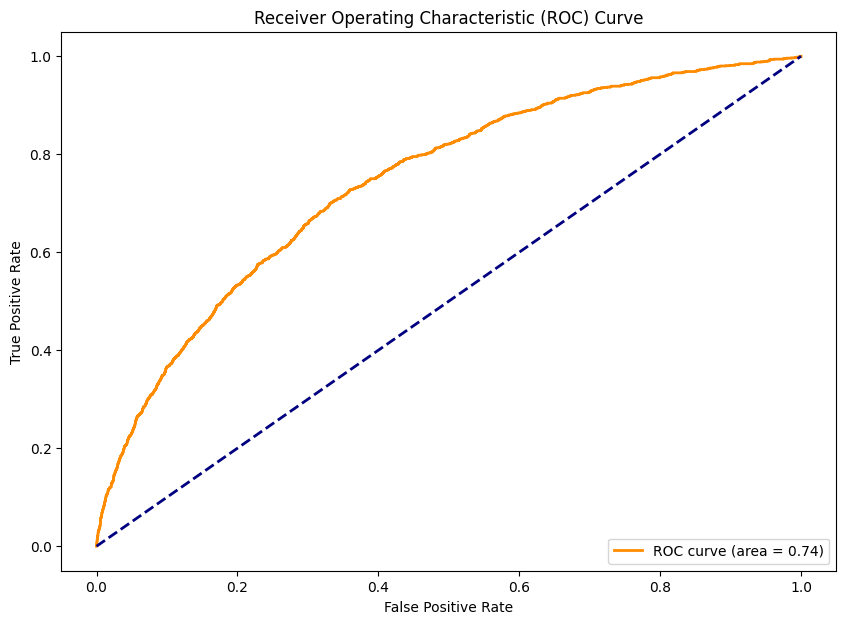

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import roc_auc_score
from tensorflow.keras.metrics import AUC
from tensorflow.keras import regularizers

# Callback untuk memantau AUC-ROC
class ROCCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]

    def on_epoch_end(self, epoch, logs={}):
        y_pred_val = self.model.predict(self.x_val)
        roc_val = roc_auc_score(self.y_val, y_pred_val)
        print(f'\nVal AUC for epoch {epoch} is {roc_val:.4f}')

# Membuat model dengan regularisasi L2
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(X_train_resampled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Gunakan optimizer Adam dengan learning rate yang lebih rendah
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=[AUC(name='auc')])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
roc_callback = ROCCallback(validation_data=(X_test_scaled, y_test))

model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_test_scaled, y_test),
    epochs=100, batch_size=32, 
    callbacks=[early_stop, roc_callback]
)

# 1. Simpan model
model.save('ANN_model.h5')

# 2. Buat prediksi dengan model pada data uji
y_pred_prob_ann = model.predict(X_test_scaled)

# 3. Hitung skor ROC-AUC
roc_auc_ann = roc_auc_score(y_test, y_pred_prob_ann)
print(f"ROC AUC Score with ANN: {roc_auc_ann:.4f}")

# 4. Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_ann)
plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_ann:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [26]:
# Membangun model Deep Learning dengan Keras
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import roc_auc_score

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.AUC(from_logits=True)])

# Melatih model
model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Mengevaluasi model
y_pred_raw = model.predict(X_test_scaled)
y_pred_class = (y_pred_raw > 0.5).astype(int).flatten()
accuracy = np.mean(y_pred_class == y_test)
print(f"Accuracy: {accuracy:.4f}")

y_pred_prob = model.predict(X_test_scaled).flatten()
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Menyimpan model
model.save("deep_learning_model.h5")

Epoch 1/20
   1/1919 [..............................] - ETA: 5:30 - loss: 0.9413 - auc_1: 0.3621

/Users/baskoronugroho/python-projects/telkom-athon-ds/venv/lib/python3.10/site-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1919/1919 [==============================] - 2s 743us/step - loss: 0.2911 - auc_1: 0.5887 - val_loss: 0.2623 - val_auc_1: 0.6778
Epoch 2/20
1919/1919 [==============================] - 1s 662us/step - loss: 0.2663 - auc_1: 0.6685 - val_loss: 0.2558 - val_auc_1: 0.7019
Epoch 3/20
1919/1919 [==============================] - 1s 727us/step - loss: 0.2601 - auc_1: 0.6929 - val_loss: 0.2541 - val_auc_1: 0.7147
Epoch 4/20
1919/1919 [==============================] - 1s 665us/step - loss: 0.2575 - auc_1: 0.7003 - val_loss: 0.2528 - val_auc_1: 0.7181
Epoch 5/20
1919/1919 [==============================] - 1s 690us/step - loss: 0.2549 - auc_1: 0.7115 - val_loss: 0.2515 - val_auc_1: 0.7221
Epoch 6/20
1919/1919 [==============================] - 1s 710us/step - loss: 0.2529 - auc_1: 0.7178 - val_loss: 0.2513 - val_auc_1: 0.7231
Epoch 7/20
1919/1919 [==============================] - 1s 712us/step - loss: 0.2527 - auc_1: 0.7190 - val_loss: 0.2510 - val_auc_1: 0.7233
Epoch 8/20
1919/1919 [=========

/Users/baskoronugroho/python-projects/telkom-athon-ds/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Coba Data Baru

In [214]:
# download prediction data
queries = ['PREDICTION_CREDIT_APPLICATION','PREDICTION_BKI_BALANCE', 'PREDICTION_BKI', 
'PREDICTION_CASH_BALANCE_MIN', 'PREDICTION_CASH_BALANCE_MAX', 'PREDICTION_CREDIT_BALANCE_MIN', 'PREDICTION_CREDIT_BALANCE_MAX',
'PREDICTION_INSTALLMENT_PAYMENT_MAX', 'PREDICTION_INSTALLMENT_PAYMENT_MIN', 'PREDICTION_PREVIOUS_LOAN_AVG']

indexes = ['reco_id_curr', 'reco_bureau_id', 'reco_id_last']

for quer in queries:
    download_df = run_query(f"test_queries/{quer}.sql")
    print(f"downloading {quer}...")
    print(f"data rows {quer}: {len(download_df)}")
    # for idx in indexes:
    #     if idx in download_df.columns:
    #         download_df.set_index([idx], inplace=True)
    download_df.to_csv(f"prediction/{quer}.csv")
    print(f"{quer} csv generated!\n")

downloading PREDICTION_CREDIT_APPLICATION...
data rows PREDICTION_CREDIT_APPLICATION: 1000
PREDICTION_CREDIT_APPLICATION csv generated!

downloading PREDICTION_BKI_BALANCE...
data rows PREDICTION_BKI_BALANCE: 1346
PREDICTION_BKI_BALANCE csv generated!

downloading PREDICTION_BKI...
data rows PREDICTION_BKI: 1000
PREDICTION_BKI csv generated!

downloading PREDICTION_CASH_BALANCE_MIN...
data rows PREDICTION_CASH_BALANCE_MIN: 675
PREDICTION_CASH_BALANCE_MIN csv generated!

downloading PREDICTION_CASH_BALANCE_MAX...
data rows PREDICTION_CASH_BALANCE_MAX: 675
PREDICTION_CASH_BALANCE_MAX csv generated!

downloading PREDICTION_CREDIT_BALANCE_MIN...
data rows PREDICTION_CREDIT_BALANCE_MIN: 312
PREDICTION_CREDIT_BALANCE_MIN csv generated!

downloading PREDICTION_CREDIT_BALANCE_MAX...
data rows PREDICTION_CREDIT_BALANCE_MAX: 312
PREDICTION_CREDIT_BALANCE_MAX csv generated!

downloading PREDICTION_INSTALLMENT_PAYMENT_MAX...
data rows PREDICTION_INSTALLMENT_PAYMENT_MAX: 144
PREDICTION_INSTALLMENT_

In [15]:
# credit appication
cred_app_df = pd.read_csv('prediction/PREDICTION_CREDIT_APPLICATION.csv') #
pred_gabung_df = cred_app_df

# add BKI
bki_df = pd.read_csv('prediction/PREDICTION_BKI.csv') #
pred_gabung_df = cred_app_df.merge(bki_df, on='reco_id_curr', how='left')

# add BKI BALANCE
bki_balance_df = pd.read_csv('prediction/PREDICTION_BKI_BALANCE.csv') #
pred_gabung_df = pred_gabung_df.merge(bki_balance_df, on='reco_bureau_id', how='left')

# add CASH BALANCE MIN
cash_balance_min_df = pd.read_csv('prediction/PREDICTION_CASH_BALANCE_MIN.csv') #
pred_gabung_df = pred_gabung_df.merge(cash_balance_min_df, on='reco_id_curr', how='left')
# add CASH BALANCE MIN
cash_balance_max_df = pd.read_csv('prediction/PREDICTION_CASH_BALANCE_MAX.csv') #
pred_gabung_df = pred_gabung_df.merge(cash_balance_max_df, on='reco_id_curr', how='left')

# add CRED BALANCE MIN
cred_balance_min_df = pd.read_csv('prediction/PREDICTION_CREDIT_BALANCE_MIN.csv') #
pred_gabung_df = pred_gabung_df.merge(cred_balance_min_df, on='reco_id_curr', how='left')
# add CRED BALANCE MAX
cred_balance_max_df = pd.read_csv('prediction/PREDICTION_CREDIT_BALANCE_MAX.csv') #
pred_gabung_df = pred_gabung_df.merge(cred_balance_max_df, on='reco_id_curr', how='left')

# add INSTALLMENT PAYMENT MIN
install_payment_min_df = pd.read_csv('prediction/PREDICTION_INSTALLMENT_PAYMENT_MIN.csv')
pred_gabung_df = pred_gabung_df.merge(install_payment_min_df, on='reco_id_curr', how='left')
# add INSTALLMENT PAYMENT MAX
install_payment_max_df = pd.read_csv('prediction/PREDICTION_INSTALLMENT_PAYMENT_MAX.csv')
pred_gabung_df = pred_gabung_df.merge(install_payment_max_df, on='reco_id_curr', how='left')

# add PREVIOUS_LOAN_AVG
prev_load_df = pd.read_csv('prediction/PREDICTION_PREVIOUS_LOAN_AVG.csv')
pred_gabung_df = pred_gabung_df.merge(prev_load_df, on='reco_id_curr', how='left')

/var/folders/rd/6xfgpl957d97j9wgzr8mtqtm0000gn/T/ipykernel_47742/1977873235.py:15: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  pred_gabung_df = pred_gabung_df.merge(cash_balance_min_df, on='reco_id_curr', how='left')
/var/folders/rd/6xfgpl957d97j9wgzr8mtqtm0000gn/T/ipykernel_47742/1977873235.py:22: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  pred_gabung_df = pred_gabung_df.merge(cred_balance_min_df, on='reco_id_curr', how='left')
/var/folders/rd/6xfgpl957d97j9wgzr8mtqtm0000gn/T/ipykernel_47742/1977873235.py:29: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  pred_gabung_df = pred_gabung_df.merge(install_payment_min_df, on='reco_id_curr', how='left'

In [16]:
reco_id_curr = pred_gabung_df['reco_id_curr'].copy()
pred_gabung_df.reset_index()
# pred_gabung_df.drop(columns=['reco_bureau_id'], inplace=True)
pred_gabung_df.set_index(['reco_id_curr'], inplace=True)
pred_gabung_df.describe()

,Unnamed: 0_x,children_count,income,loan_body,annuity_payment,goods_price,population_relative_region,days_birth,days_employed,registration_timestamp,...,avg(first_payment),AVG(goods_price),AVG(hour_of_approval_process_start),AVG(down_payment_rate),AVG(days_decision),AVG(area_seller_place),AVG(days_first_drawing),AVG(days_first_due),AVG(first_due_date),AVG(termination_date)
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,...,993.000000,9.930000e+02,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000
mean,499.500000,0.442000,1.716550e+05,6.088968e+05,27114.534000,5.466057e+05,0.020875,-16156.423000,65184.30400,-4966.569000,...,3739.188914,1.567620e+05,12.660423,0.045899,-916.350253,397.185553,247317.321411,8798.753955,21172.970364,63231.971278
std,288.819436,0.763688,9.527244e+04,3.922021e+05,13351.713554,3.607882e+05,0.013922,4225.846986,142571.38087,3448.720332,...,7912.186404,1.530644e+05,2.818205,0.062159,587.178122,1423.748690,100233.335636,30013.622553,42461.982707,88211.552020
min,0.000000,0.000000,2.655000e+04,5.400000e+04,4369.500000,0.000000e+00,0.001276,-24960.000000,-14522.00000,-16223.000000,...,0.000000,0.000000e+00,3.000000,0.000000,-2919.000000,-1.000000,-2741.000000,-2856.000000,-2606.000000,-2583.000000
25%,249.750000,0.000000,1.125000e+05,2.783375e+05,16990.875000,2.475000e+05,0.009657,-19755.250000,-2785.00000,-7605.000000,...,0.000000,6.162750e+04,11.000000,0.000000,-1216.100000,21.333300,182368.000000,-962.400000,-506.380952,-460.500000
50%,499.500000,0.000000,1.575000e+05,5.311505e+05,24660.000000,4.500000e+05,0.018850,-15798.500000,-1348.50000,-4394.500000,...,1350.000000,1.084662e+05,12.760000,0.025701,-783.333300,73.250000,243495.333333,-528.000000,-99.400000,32942.590909
75%,749.250000,1.000000,2.025000e+05,8.140410e+05,35427.375000,6.885000e+05,0.028663,-12688.000000,-314.25000,-2232.250000,...,4386.375000,1.999155e+05,14.500000,0.066587,-460.571400,385.500000,365243.000000,-216.500000,32939.272727,91088.500000
max,999.000000,6.000000,1.350000e+06,2.338070e+06,93487.500000,2.250000e+06,0.072508,-7907.000000,365243.00000,-14.000000,...,122793.750000,1.665000e+06,21.000000,0.559311,-43.000000,37412.500000,365243.000000,182585.000000,365243.000000,365243.000000


In [17]:
pred_gabung_df.drop(pred_gabung_df.filter(regex='Unnamed').columns, axis=1, inplace=True)
pred_gabung_df.drop(pred_gabung_df.filter(regex='reco_bureau_id').columns, axis=1, inplace=True)
pred_gabung_df.drop(pred_gabung_df.filter(regex='reco_id_last').columns, axis=1, inplace=True)

reduced_df = remove_highly_correlated_features(pred_gabung_df)
print(pred_gabung_df.shape)
print(reduced_df.shape)

(1000, 204)
(1000, 139)


In [18]:
merged_columns = []
for col in gabung_df.columns:
    merged_columns.append(col)
    
pred_gabung_columns = []
for col in pred_gabung_df.columns:
    pred_gabung_columns.append(col)

s = set(merged_columns)
temp3 = [x for x in pred_gabung_columns if x not in s]
print(temp3)
print((pred_gabung_df.shape))
# print(sorted(merged_columns))
# print(sorted(reduced_columns))
pred_gabung_df.drop(columns=temp3, inplace=True)
print((pred_gabung_df.shape))

[]
(1000, 204)
(1000, 204)


In [19]:
# Ambil data baru
df_predict = pred_gabung_df.copy()

In [20]:
import pandas as pd
import joblib
import numpy as np

# Load label encoders and scaler first
label_encoders = joblib.load('label_encoders.pkl')
scaler = joblib.load('data_scaler.pkl')

# Simpan kolom 'reco_id_curr' untuk digabungkan lagi nanti
# reco_id_curr = df_predict['reco_id_curr'].copy()
# df_predict.drop(columns=['reco_id_curr', 'annuity_payment'], inplace=True)

# Mengisi missing values
for col in df_predict.select_dtypes(include=['float64', 'int64']).columns:
    df_predict[col].fillna(df_predict[col].median(), inplace=True)
for col in df_predict.select_dtypes(include=['object']).columns:
    df_predict[col].fillna(df_predict[col].mode()[0], inplace=True)

# Misalkan Anda memiliki list dari semua kolom kategorikal
categorical_cols = df_predict.select_dtypes(include=['object']).columns

cols_to_drop = []  # List untuk menyimpan kolom yang harus dihapus

for col in categorical_cols:
    try:
        # print(f"Processing column: {col}")
        
        # Cari label yang belum pernah dilihat
        unseen_labels = set(df_predict[col]) - set(label_encoders[col].classes_)
        
        # Gantikan label yang belum pernah dilihat dengan NaN atau 'lainnya'
        temp_df = df_predict[col].replace(unseen_labels, np.nan)  # atau gantikan np.nan dengan 'lainnya'
        
        # Sekarang lakukan transform
        temp_transformed = label_encoders[col].transform(temp_df.fillna(temp_df.mode()[0]))
        df_predict[col] = temp_transformed  # <-- Tambahkan baris ini untuk memperbarui kolom asli dengan hasil transformasi
        # print(f"Column {col} processed successfully!")
        
    except Exception as e:
        print(f"Error encountered with column {col}: {e}")
        cols_to_drop.append(col)

# Menghapus kolom bermasalah
if cols_to_drop:
    df_predict = df_predict.drop(columns=cols_to_drop)
    print(f"Dropped columns: {', '.join(cols_to_drop)}")

# Penskalaan fitur
df_predict_scaled = scaler.transform(df_predict)

# 2. Prediksi menggunakan probabilitas
model = joblib.load('LightGBM_model.pkl')
predicted_proba = model.predict_proba(df_predict_scaled)[:, 1]

# 3. Gabungkan probabilitas prediksi dengan reco_id_curr dalam DataFrame
result_df = pd.DataFrame({
    'reco_id_curr': reco_id_curr,
    'predicted_proba': predicted_proba
})

print(result_df)

                         reco_id_curr  predicted_proba
0    38027ebd59e7c2614201a9ad29d91f33         0.050653
1    f7825cc89df0a3665baddede33a196f0         0.128186
2    73ed7df79781a75b16431fc4c9dd50e9         0.226968
3    bec10049923a0bb209a2044d06a96e86         0.347658
4    8095e640b1088676e43264eb470b4806         0.517667
..                                ...              ...
995  a613d20807ab1699d07446e7925e1d1e         0.407768
996  4d10b7b0ff7f5d4654c0a6d25661a19f         0.173438
997  b2c36586339db9b42f1f140ee10c1dee         0.397835
998  0de9581c9037f50a115908a386d859fd         0.287654
999  7a80d7cd89b7e5378e29ea8d624c392f         0.195815

[1000 rows x 2 columns]


In [21]:
result_df.shape

(1000, 2)

In [22]:
# Baca example_df dari file CSV dan hanya ambil kolom reco_id_curr dan urut
example_df = pd.read_csv('./example_submission.csv', usecols=['reco_id_curr', 'urut'], sep=';')

# Rename kolom predicted_proba menjadi target pada df
result_df.rename(columns={'predicted_proba': 'target'}, inplace=True)

# Lakukan inner join antara df dan example_df berdasarkan kolom reco_id_curr
merged_df = pd.merge(result_df, example_df, on='reco_id_curr', how='inner')

# Urutkan merged_df berdasarkan kolom urut
merged_df.sort_values(by='urut', inplace=True)

current_time = datetime.now().strftime('%Y_%m_%d_%H_%M')
filename = f"output_{current_time}.csv"
# Simpan DataFrame ke file CSV dengan hanya mengambil kolom reco_id_curr dan target
merged_df[['reco_id_curr', 'target']].to_csv(filename, index=False, sep=',')

print(f"CSV file telah dibuat! {filename}")

CSV file telah dibuat! output_2023_09_29_19_56.csv


In [ ]:
import pkg_resources

installed_packages = pkg_resources.working_set
installed_packages_list = sorted(["%s==%s" % (i.key, i.version) for i in installed_packages])
for m in installed_packages_list:
    print(m)